In [1]:
import os,sys
from dotenv import find_dotenv,load_dotenv
load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import hvplot.pandas
import cartopy.crs as ccrs
import cartopy.feature
import data_reader_writer

# Setting up simulation period

We need to set the required inputs to simulate the LOPF such as the start data, end date and simualtion snaphsots

In [3]:
My_network=pypsa.Network()
My_network.import_from_csv_folder('LOPF_data_heat_FES')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data_heat_FES has buses, generators, lines, links, loads, storage_units


 Let us import the heat demand profiles

In [4]:
heating_EDRP=pd.read_csv('REMA/domestic_EDRP/scaled with normalised profiles/hourly heat demand total_withGasboilers_MW.csv')
heating_EDRP_DHN=pd.read_csv('REMA/domestic_EDRP/DHN/scaled with normalised profiles/hourly heat demand total_withDHN_MW.csv')
heating_RHPP=pd.read_csv('REMA/domestic_RHPP/scaled with normalised profiles/hourly heat demand total_withHPs_MW.csv')

In [5]:
#My_network.loads_t.p_set.div(1e3).plot(figsize=(12,4),ylabel='GW')    # plotting the demand
#load_heat=My_network.loads_t.p_set.groupby(My_network.loads.carrier,axis=1).sum().div(1e3)
#My_network.loads_t.p_set.iloc[:,0:29].sum().div(1e3)

In [6]:
p0=My_network.buses.index[0:29].tolist()
p1=My_network.buses.index[29:58].tolist()

In [7]:
# let us comment the code since we have to and then add p2g and chp or boiler later

#for i in range(29):     #uncomment this code if you want to use electricty 2 gas conversion, if you want to assume a separate gas pip is used for boiler comment this, and uncomment the gas boiler line of code
    #My_network.add(
    #'Link',
    #'P2G {}'.format(i+1),
    #bus0=p0[i],
    #bus1=p1[i],
    #efficiency=0.8,
    #capital_cost=1000,
        #p_nom_min=0,
        #p_nom_max=10000,
    #p_nom_extendable=True,
        #carrier='gas'
    #)
    
    
    
    
#for i in range(29):
 #   My_network.add(
  #  'Load',
   # 'load gasheating {}'.format (i+1),
   # bus='Heat Bus {}'.format(i+1),
    #    p_set=heating_EDRP.iloc[:,i+1].values.tolist(),
        #carrier='Natural Gas',
     #  carrier='heat',
    #)
    
    
    
    #for i in range(29):
        #My_network.add(
        #"Link",
        #"boiler {}".format(i+1),
        #bus0=p1[i],
        #bus1='Heat Bus {}'.format(i+1),
       #p_nom_extendable=True,
        #efficiency=0.94,
        #marginal_cost=20.0,
       # carrier="gas",
    #)
    
#for i in range(29):
   # My_network.add(
        #"Generator",
        #"boiler {}".format(i+1),
       # bus0=B0[i],
       #bus='Heat Bus {}'.format(i+1),
       #p_nom_extendable=True,
       #efficiency=0.94,
       # marginal_cost=20.0,
       # carrier="heat",
    #)
    
    

In [8]:
for i in range(29):
    My_network.add(
        "Generator",
        "boiler {}".format(i+1),
       bus='Heat Bus {}'.format(i+1),
       p_nom_extendable=True,
        efficiency=0.80,
        marginal_cost=20.0,
        carrier="heat",
    )

In [9]:
#My_network.links['p_nom_extendable']
My_network.links

,bus0,bus1,carrier,p_nom,marginal_cost,ramp_limit_up,ramp_limit_down,p_nom_min,p_nom_max,type,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Link,,,,,,,,,,,,,,,,,,,,,
heat pump Beauly,Beauly,Heat Bus 1,heat,104.988,0.0,1.0,1.0,0.0,104.988,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Peterhead,Peterhead,Heat Bus 2,heat,470.460,0.0,1.0,1.0,0.0,470.460,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Errochty,Errochty,Heat Bus 3,heat,219.324,0.0,1.0,1.0,0.0,219.324,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Denny/Bonnybridge,Denny/Bonnybridge,Heat Bus 4,heat,1601.760,0.0,1.0,1.0,0.0,1601.760,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Neilston,Neilston,Heat Bus 5,heat,261.828,0.0,1.0,1.0,0.0,261.828,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Strathaven,Strathaven,Heat Bus 6,heat,2968.704,0.0,1.0,1.0,0.0,2968.704,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Torness,Torness,Heat Bus 7,heat,486.348,0.0,1.0,1.0,0.0,486.348,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Eccles,Eccles,Heat Bus 8,heat,151.980,0.0,1.0,1.0,0.0,151.980,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
heat pump Harker,Harker,Heat Bus 9,heat,363.204,0.0,1.0,1.0,0.0,363.204,,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


In [10]:
# Adding the DHN Demand to the PyPSA-GB Network
#for i in range(29):
   # My_network.add(
   # 'Load',
    #'load DHN {}'.format(i+1),
    #bus='Heat Bus {}'.format(i+1),
        #p_set=heating_EDRP_DHN.iloc[:,i+1].values.tolist(),
        #carrier='heat'
   # )

To approximate n-1 security and allow room for reactive power flows, don't allow any line to be loaded above 70% of thier thermal rating

In [11]:
contingency_factor = 0.7
My_network.lines.s_max_pu[0:99] *= contingency_factor

In [12]:
COPs=pd.read_csv('LOPF_data_heat/hourly COP_HPs.csv')
cop_1=COPs['Beauly COP'].values.tolist()

In [13]:
B0=My_network.buses.index[0:29].tolist()
B1=My_network.buses.index[29:58].tolist()


In [14]:
 #My_network.loads_t.p_set['load gas 1']

In [15]:
#My_network.loads_t.p_set['load DHN 1']

In [16]:
My_network.loads_t.p_set['Beauly_h_load']

snapshot
2022-01-01 00:00:00     456.475010
2022-01-01 01:00:00     456.475010
2022-01-01 02:00:00     456.475010
2022-01-01 03:00:00     480.791023
2022-01-01 04:00:00     841.968923
                          ...     
2022-12-31 19:00:00    6280.158735
2022-12-31 20:00:00    6280.158735
2022-12-31 21:00:00    6280.158735
2022-12-31 22:00:00    6280.158735
2022-12-31 23:00:00    6280.158735
Name: Beauly_h_load, Length: 8760, dtype: float64

In [17]:
My_network.storage_units
My_network.loads_t.p_set
My_network.storage_units

,p_nom,carrier,marginal_cost,max_hours,efficiency_store,efficiency_dispatch,state_of_charge_initial,bus,standing_loss,capital_cost,...,q_set,sign,build_year,lifetime,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
Dinorwig,1728.0,Pumped Storage Hydroelectric,0.0,5.266,0.865,0.865,9099.648,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
Ffestiniog,360.0,Pumped Storage Hydroelectric,0.0,3.889,0.850,0.850,1400.040,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
Cruachan,440.0,Pumped Storage Hydroelectric,0.0,16.136,0.865,0.865,7099.840,Errochty,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
Foyers,300.0,Pumped Storage Hydroelectric,0.0,21.000,0.865,0.865,6300.000,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
STES_Beauly,500.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.900,1440000.000,Heat Bus 1,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
STES_Peterhead,500.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.900,1440000.000,Heat Bus 2,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
STES_Errochty,500.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.900,1440000.000,Heat Bus 3,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
STES_Denny/BonnyBdige,501.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.900,1440000.000,Heat Bus 4,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0
STES_Neilston,502.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.900,1440000.000,Heat Bus 5,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,0.0


In [18]:
My_network.consistency_check()    # will make to check if there is any inconsistency in the network that will lead to infeasibility

In [ ]:
 My_network.lopf(My_network.snapshots,solver_name="gurobi", pyomo=False)
    #My_network.optimize(solver_name='gurobi')  # 

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 111.45s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-29
Read LP format model from file C:\Users\salene\AppData\Local\Temp\pypsa-problem-qbr8p1z8.lp
Reading time = 63.73 seconds
obj: 21741396 rows, 6088259 columns, 39181599 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 21741396 rows, 6088259 columns and 39181599 nonzeros
Model fingerprint: 0xe42cb404
Coefficient statistics:
  Matrix range     [6e-05, 3e+03]
  Objective range  [1e+00, 1e+09]
  Bounds range     [1e+07, 1e+07]
  RHS range        [5e-06, 1e+09]
Presolve removed 19437530 rows and 1647455 columns (presolve time = 6s) ...
Presolve removed 19437530 rows and 2775095 columns (presolve time = 10s) ...
Presolve removed 19901991 rows and 3239556 columns (presolve time = 15s) ...
Preso

  89   1.04772773e+11  1.04729974e+11  5.36e-07 7.15e-07  7.70e+00   312s
  90   1.04771176e+11  1.04730792e+11  7.90e-07 7.15e-07  7.27e+00   316s
  91   1.04768356e+11  1.04731150e+11  7.30e-07 7.15e-07  6.70e+00   322s
  92   1.04766629e+11  1.04731793e+11  6.12e-07 7.15e-07  6.27e+00   326s
  93   1.04765807e+11  1.04732175e+11  6.00e-07 7.15e-07  6.05e+00   332s
  94   1.04763776e+11  1.04732863e+11  5.54e-07 7.15e-07  5.56e+00   337s
  95   1.04762436e+11  1.04733157e+11  5.30e-07 7.15e-07  5.27e+00   341s
  96   1.04760662e+11  1.04733553e+11  5.06e-07 7.15e-07  4.88e+00   346s
  97   1.04759643e+11  1.04733795e+11  4.85e-07 7.15e-07  4.65e+00   350s
  98   1.04757525e+11  1.04734160e+11  4.42e-07 7.15e-07  4.20e+00   354s
  99   1.04756728e+11  1.04734558e+11  4.26e-07 7.15e-07  3.99e+00   359s
 100   1.04755556e+11  1.04734629e+11  4.01e-07 7.15e-07  3.77e+00   363s
 101   1.04754217e+11  1.04734911e+11  3.76e-07 7.15e-07  3.47e+00   368s
 102   1.04753315e+11  1.04735092e+11 

INFO:pypsa.linopf:Optimization successful. Objective value: 1.05e+11


In [61]:
My_network.generators.p_nom_opt.div(1e3) # GW  optimised capacity of generators in GW
My_network.storage_units.p_nom_opt.div(1e3)  # GW 
#My_network.links_t.efficiency 
My_network.storage_units

,p_nom,carrier,marginal_cost,max_hours,efficiency_store,efficiency_dispatch,state_of_charge_initial,bus,standing_loss,capital_cost,...,q_set,sign,build_year,lifetime,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
Dinorwig,1728.0,Pumped Storage Hydroelectric,0.0,5.266,0.865,0.865,9099.648,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1728.000000
Ffestiniog,360.0,Pumped Storage Hydroelectric,0.0,3.889,0.850,0.850,1400.040,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,360.000000
Cruachan,440.0,Pumped Storage Hydroelectric,0.0,16.136,0.865,0.865,7099.840,Errochty,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,440.000000
Foyers,300.0,Pumped Storage Hydroelectric,0.0,21.000,0.865,0.865,6300.000,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,300.000000
STES_Beauly,500.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.900,1440000.000,Heat Bus 1,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.899285
STES_Peterhead,500.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.900,1440000.000,Heat Bus 2,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1258.469168
STES_Errochty,500.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.900,1440000.000,Heat Bus 3,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.807173
STES_Denny/BonnyBdige,501.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.900,1440000.000,Heat Bus 4,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,3621.062135
STES_Neilston,502.0,Seasonal Thermal Energy Storage,0.0,2880.000,0.900,0.900,1440000.000,Heat Bus 5,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.910088


In [62]:
My_network.storage_units[4:33]

,p_nom,carrier,marginal_cost,max_hours,efficiency_store,efficiency_dispatch,state_of_charge_initial,bus,standing_loss,capital_cost,...,q_set,sign,build_year,lifetime,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
STES_Beauly,500.0,Seasonal Thermal Energy Storage,0.0,2880.0,0.9,0.9,1440000.0,Heat Bus 1,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.899285
STES_Peterhead,500.0,Seasonal Thermal Energy Storage,0.0,2880.0,0.9,0.9,1440000.0,Heat Bus 2,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1258.469168
STES_Errochty,500.0,Seasonal Thermal Energy Storage,0.0,2880.0,0.9,0.9,1440000.0,Heat Bus 3,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.807173
STES_Denny/BonnyBdige,501.0,Seasonal Thermal Energy Storage,0.0,2880.0,0.9,0.9,1440000.0,Heat Bus 4,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,3621.062135
STES_Neilston,502.0,Seasonal Thermal Energy Storage,0.0,2880.0,0.9,0.9,1440000.0,Heat Bus 5,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.910088
STES_Strathaven,503.0,Seasonal Thermal Energy Storage,0.0,2880.0,0.9,0.9,1440000.0,Heat Bus 6,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.807173
STES_Torness,504.0,Seasonal Thermal Energy Storage,0.0,2880.0,0.9,0.9,1440000.0,Heat Bus 7,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.807173
STES_Eccles,505.0,Seasonal Thermal Energy Storage,0.0,2880.0,0.9,0.9,1440000.0,Heat Bus 8,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.859078
STES_Harker,506.0,Seasonal Thermal Energy Storage,0.0,2880.0,0.9,0.9,1440000.0,Heat Bus 9,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,948.578247


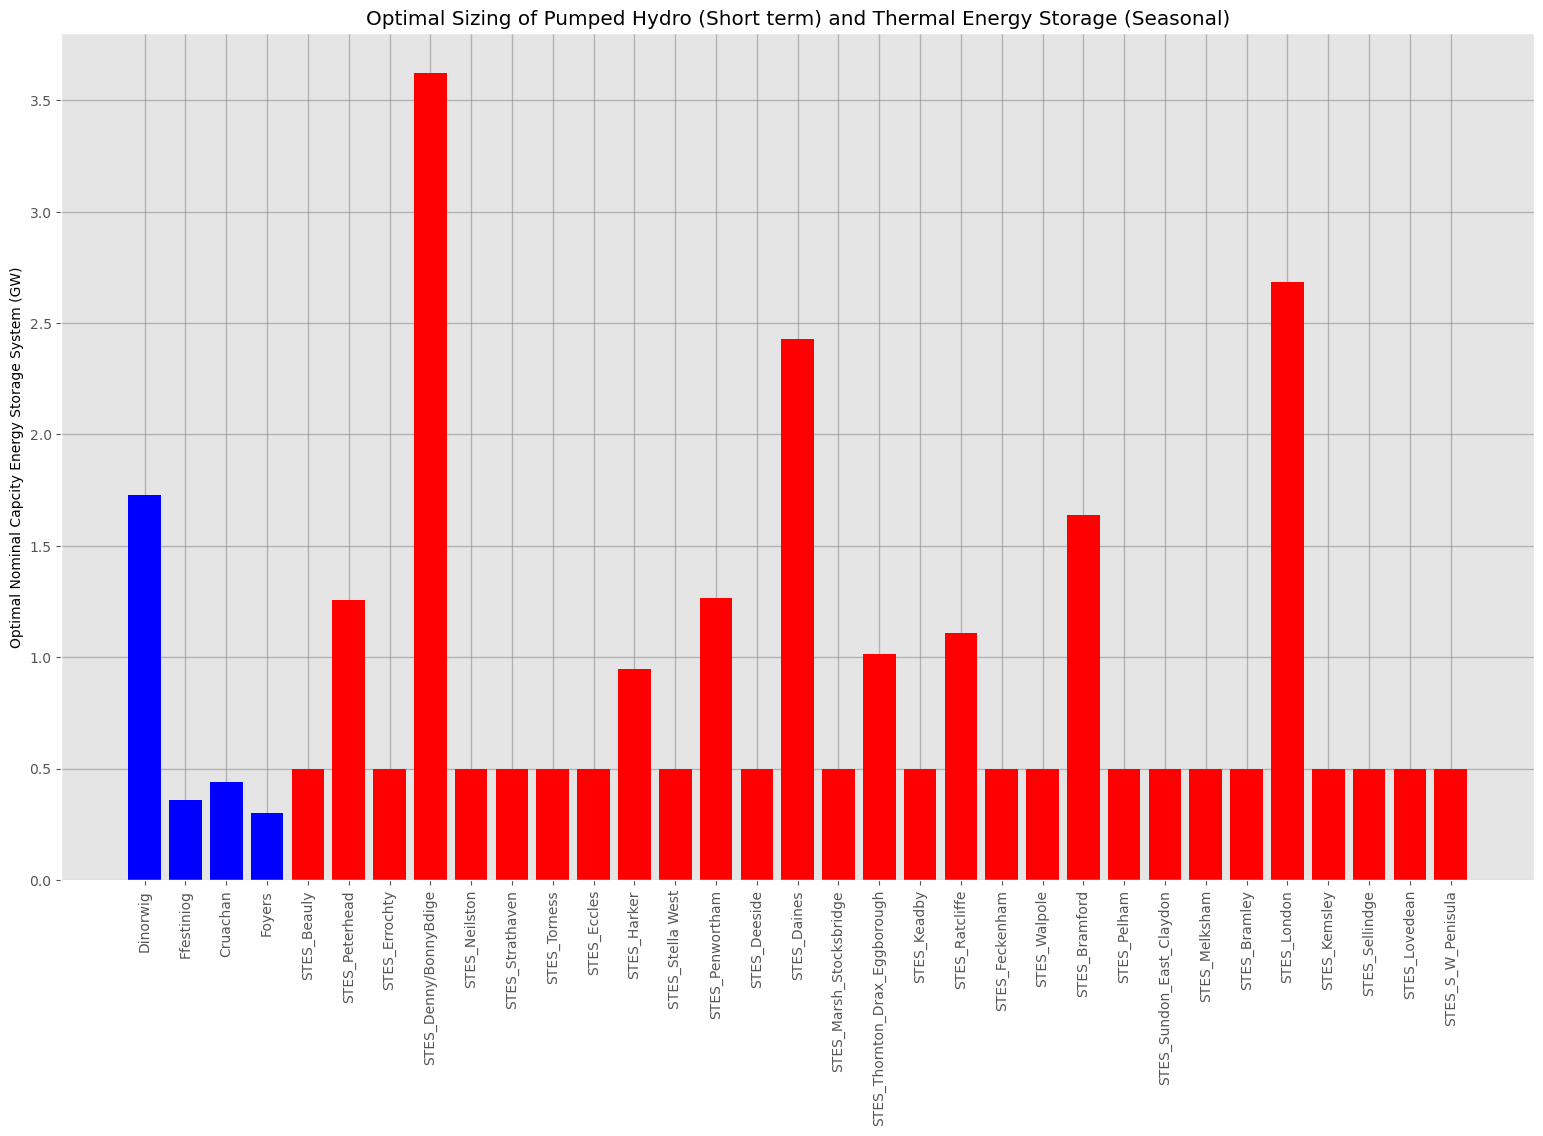

In [63]:
# charging and discharging of the energy storage units
plt.figure(figsize=(19,11))
plt.bar(My_network.storage_units.index[:4], My_network.storage_units.p_nom_opt.div(1e3).values[0:4],color='blue')
plt.bar(My_network.storage_units.index[4:33], My_network.storage_units.p_nom_opt.div(1e3).values[4:33],color='red')

plt.xticks(My_network.storage_units.index, rotation=90)
plt.ylabel('Optimal Nominal Capcity Energy Storage System (GW)')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Optimal Sizing of Pumped Hydro (Short term) and Thermal Energy Storage (Seasonal)')
plt.show()

# Power output by generation type

<Axes: title={'center': 'FES 2022'}, xlabel='Operation Period', ylabel='Charging/Discharging Power [GW]'>

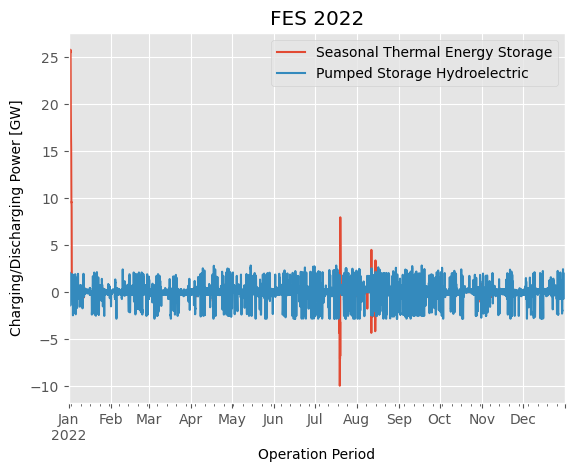

In [64]:
storage_by_carrier=My_network.storage_units_t.p.groupby(My_network.storage_units.carrier,axis=1).sum().div(1e3)    # GW
storage_by_carrier['Seasonal Thermal Energy Storage'].plot(ylabel='Charging/Discharging Power [GW]',xlabel='Operation Period',title='FES 2022',legend=True)
#storage_by_carrier['Seasonal Thermal Energy Storage'][890:920]
storage_by_carrier['Pumped Storage Hydroelectric'].plot(ylabel='Charging/Discharging Power [GW]',xlabel='Operation Period',title ='FES 2022',legend=True)

In [65]:
p_by_carrier = My_network.generators_t.p.groupby(
    My_network.generators.carrier, axis=1).sum()

storage_by_carrier = My_network.storage_units_t.p.groupby(
    My_network.storage_units.carrier, axis=1).sum()
# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0
p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)



# interconnector exports
exports = My_network.loads_t.p
# multiply by negative one to convert it as a generator
# i.e. export is a positive load, but negative generator
exports['Interconnectors Export'] = exports.iloc[:, -6:].sum(axis=1) * -1
interconnector_export = exports[['Interconnectors Export']]

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)']) #+
    #p_by_carrier['Landfill Gas'] + p_by_carrier['Anaerobic Digestion'] +
    #p_by_carrier['Sewage Sludge Digestion'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

p_by_carrier

carrier,Biomass (co-firing),Biomass (dedicated),CCS Biomass,CCS Gas,Coal,Hydrogen,Hydro,Natural Gas,Nuclear,Oil,...,Tidal stream,Unmet Load,Waste,Wave power,Wind Offshore,Wind Onshore,heat,Pumped Storage Hydroelectric,Seasonal Thermal Energy Storage,Biomass
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,521.22,2878.380835,0.0,0.0,0.0,0.0,303.254809,1526.622002,4233.126921,0.0,...,4.963827,0.0,0.0,0.0,13907.902460,7817.278347,45985.180401,0.000000,24758.754560,3399.600835
2022-01-01 01:00:00,521.22,2878.380835,0.0,0.0,0.0,0.0,284.647503,0.000000,4250.031955,0.0,...,13.031768,0.0,0.0,0.0,13890.484979,7743.598667,35622.994798,0.000000,24429.574172,3399.600835
2022-01-01 02:00:00,521.22,2878.380835,0.0,0.0,0.0,0.0,284.425986,0.000000,4266.936989,0.0,...,12.619518,0.0,0.0,0.0,13497.983187,7945.399597,35232.562403,300.000000,24419.113710,3399.600835
2022-01-01 03:00:00,521.22,2878.380835,0.0,0.0,0.0,0.0,338.254268,0.000000,4283.842023,0.0,...,6.719764,0.0,0.0,0.0,13511.213840,8160.997719,41515.966081,300.000000,25011.440182,3399.600835
2022-01-01 04:00:00,521.22,2878.380835,0.0,0.0,0.0,0.0,419.550482,0.000000,4300.747057,0.0,...,1.351940,0.0,0.0,0.0,13493.981251,8126.333218,78417.463952,300.000000,25296.385336,3399.600835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,521.22,3100.334682,0.0,0.0,0.0,0.0,703.927091,8465.066555,4434.750001,0.0,...,2.376458,0.0,0.0,0.0,14352.474186,5798.359975,517784.415049,530.841046,0.000000,3621.554682
2022-12-31 20:00:00,521.22,3100.334682,0.0,0.0,0.0,0.0,663.065124,9140.802001,4434.750001,0.0,...,0.000000,0.0,0.0,0.0,13814.888582,5654.277209,670793.339099,218.853598,0.000000,3621.554682
2022-12-31 21:00:00,521.22,3100.334682,0.0,0.0,0.0,0.0,596.121049,5347.337026,4434.750001,0.0,...,8.424212,0.0,0.0,0.0,12743.998177,5585.329885,581388.243773,1973.185436,0.000000,3621.554682


Graph the power output of the different generation types

# Plotting Optimal Dispatch

In [ ]:
My_network.storage_units.p_nom_opt.div(1e3)*My_network.storage_units.max_hours      #GWh  storage full capcity
# Let us plot the optimal dispatch
p_by_carrier=My_network.generators_t.p.groupby(My_network.generators.carrier,axis=1).sum().div(1e3)
sto=My_network.storage_units_t.p.groupby(My_network.storage_units.carrier, axis=1).sum().div(1e3)
My_network.storage_units_t.p
carrier = pd.concat([p_by_carrier, sto], axis=1)
carrier

#fig, ax = plt.subplots(figsize=(6, 3))
#color = p_by_carrier.columns.map(My_network.carriers.color)
    
#p_by_carrier.where(p_by_carrier>0).loc[My_network.snapshots].plot.area(
      #  ax=ax,
        #linewidth=0,
        #color=color,
   # )
dispatch = pd.concat([My_network.generators_t.p, My_network.storage_units_t.p], axis=1).div(1e3)       #GW

dispatch.where(dispatch > 0, 0).hvplot.area(
    stacked=True, line_width=0,
    width=1300,
    height=350,
    hover=False,
    #color=[My_network.carriers.at[c, 'color'] for c in dispatch.columns],
    ylabel='electricity supply [GW]',
    ylim=(0,180)
)

In [74]:
My_network.statistics.capex()
My_network.statistics.opex()
# total system cost
System_cost = My_network.statistics.capex() + My_network.statistics.opex(aggregate_time='sum')



# Alternative option for claculate the cost
#opex = My_network.snapshot_weightings.generators @ (My_network.generators.marginal_cost * My_network.generators_t.p).div(1e6) # M€/a
#capex = (My_network.generators.p_nom_opt * My_network.generators.capital_cost).div(1e6) # M€/a
#capex_storage = (My_network.storage_units.p_nom_opt * My_network.storage_units.capital_cost).div(1e6) # M€/a
#System_cost=pd.concat([opex, capex, capex_storage], axis=1).sum(axis=1)
#System_cost
#System_cost.plot.pie(figsize=(2,2))

#series_without_nan = System_cost.dropna()
#series_without_nan.plot.pie(figsize=(2,2))

# compute the cost per unit of electricity consumed:

In [75]:
demand = My_network.snapshot_weightings.generators @ My_network.loads_t.p_set.sum(axis=1)
System_cost.sum()*1e6 / demand.sum()

19836693.18724557

In [76]:
# Sensitivty analysis
#sensitivity = {}
#for co2 in [150,100,50,25,0]:
   # My_network.global_constraints.loc["CO2Limit", "constant"] = co2 * 1e6
   # My_network.optimize(solver_name='gurobi')
    

In [77]:
df_network = pd.read_csv('LOPF_data_heat/buses.csv')
lon = df_network.iloc[28:]['x'].values
lat = df_network.iloc[28:]['y'].values
coordinates = np.zeros(shape=(len(lon), 2))
for i in range(len(lon)):
    coordinates[i][0] = lon[i]
    coordinates[i][1] = lat[i]

df_lines = pd.read_csv('LOPF_data_heat/lines.csv', index_col=0)
df_buses = pd.read_csv('LOPF_data_heat/buses.csv', index_col=0)

# Extract the coordinates of buses and lines for the sake of plotting
line_coordinates = []
for i in range(len(df_lines['bus0'].values)):

    bus0 = df_lines['bus0'].iloc[i]
    bus1 = df_lines['bus1'].iloc[i]
    bus0_coord = [df_buses.iloc[29:]['x'][bus0], df_buses.iloc[29:]['y'][bus0]]
    bus1_coord = [df_buses.iloc[29:]['x'][bus1], df_buses.iloc[29:]['y'][bus1]]
    line_coordinates.append([bus0_coord, bus1_coord])
    

In [78]:
df_buses.iloc[28:].index
#df_lines['bus0'].iloc[98]

Index(['Heat Bus 29', 'Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge',
       'Neilston', 'Strathaven', 'Torness', 'Eccles', 'Harker', 'Stella West',
       'Penwortham', 'Deeside', 'Daines', 'Th. Marsh/Stocksbridge',
       'Thornton/Drax/Eggborough', 'Keadby', 'Ratcliffe', 'Feckenham',
       'Walpole', 'Bramford', 'Pelham', 'Sundon/East Claydon', 'Melksham',
       'Bramley', 'London', 'Kemsley', 'Sellindge', 'Lovedean', 'S.W.Penisula',
       'Netherlands', 'Belgium', 'France1', 'France2', 'Ireland',
       'N. Ireland'],
      dtype='object', name='name')

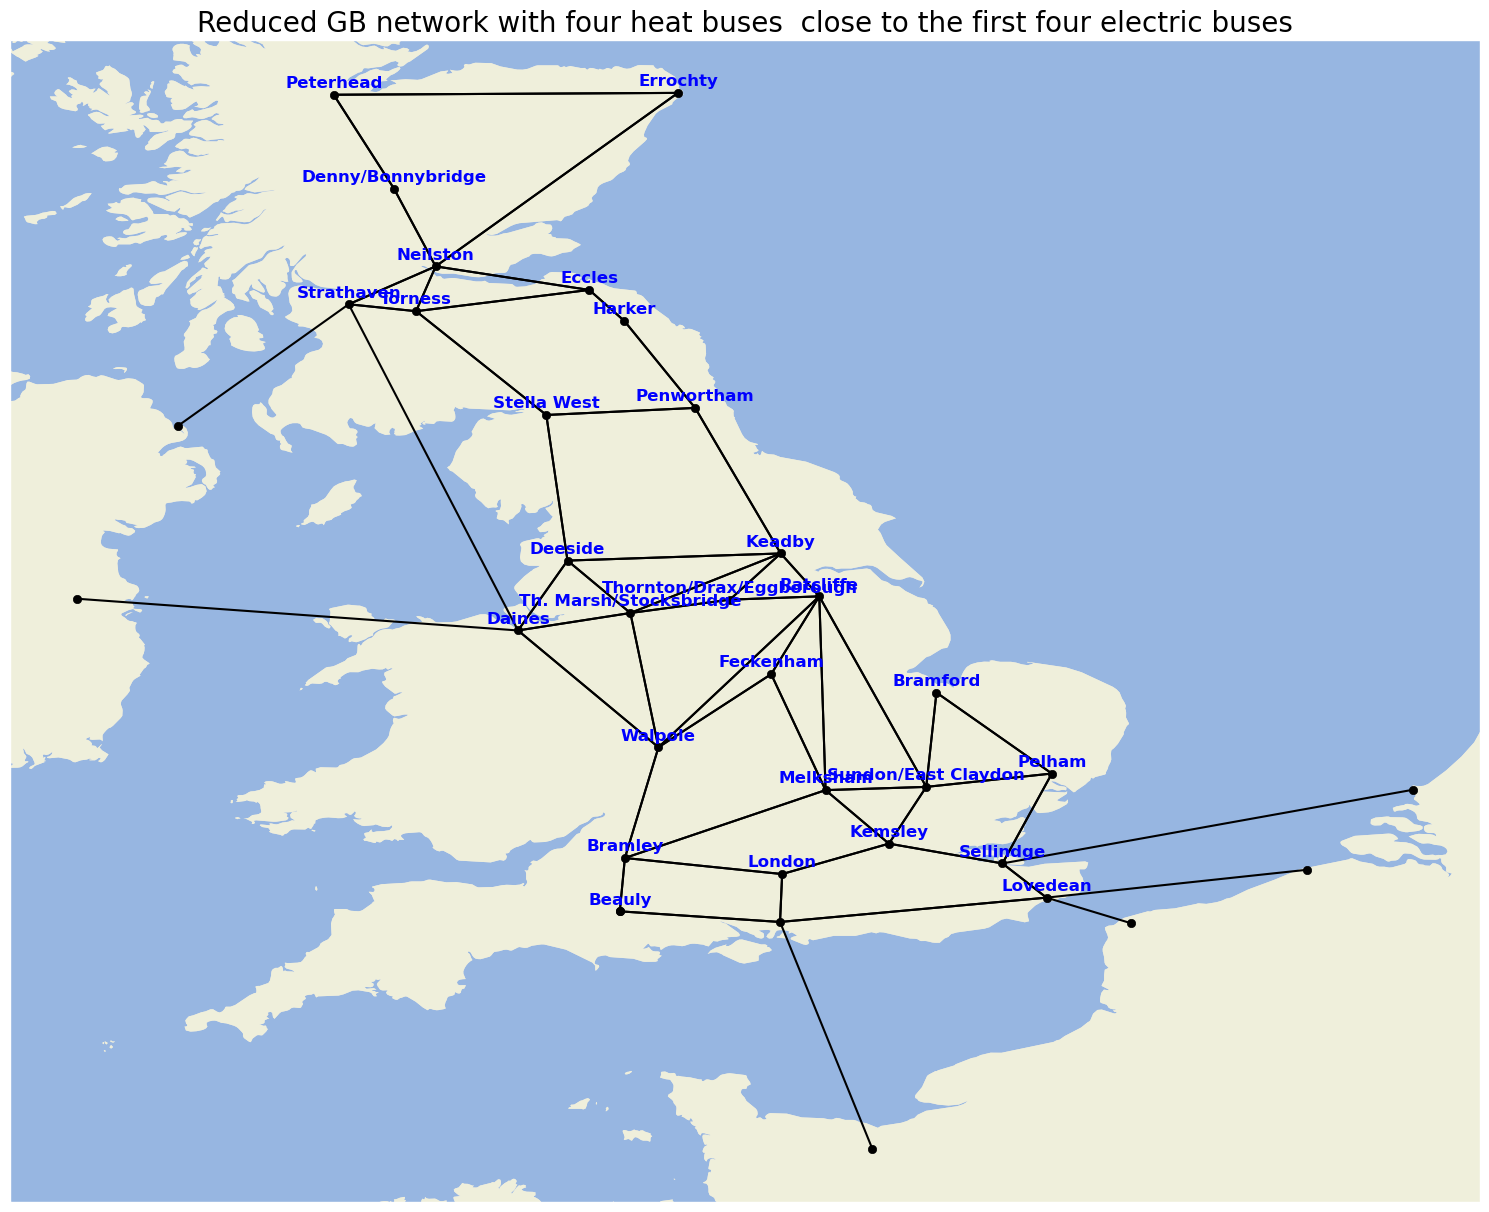

In [79]:
# then using the above information, plot the network
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

#extent = [-8.09782, 2.40511, 60, 49.5]
#ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


for i in range(len(df_lines['bus0'].values)):
    ax.plot([line_coordinates[i][0][0], line_coordinates[i][1][0]],
            [line_coordinates[i][0][1], line_coordinates[i][1][1]],
            c='black')

# display the rconnection for the heat buses and also the electric bus Beally connection with the heat bus 3 in the figure
#for h in range(4):
 #   ax.plot([df_buses['x'].iloc[h],df_buses['x'].iloc[h+1]],
 #           [df_buses['y'].iloc[h],df_buses['y'].iloc[h+1]],
 #          color='red')
    
# ax.scatter(lon, lat, s=sizes * marker_scaler, c='black', edgecolors='black')

#ax.scatter(lon[0:4], lat[0:4], c='red', edgecolors='red')
#ax.scatter(lon[4:], lat[4:], c='black', edgecolors='black')
ax.scatter(lon, lat, c='black', edgecolors='black')
for i, txt in enumerate(df_buses.iloc[29:57].index):
    ax.annotate(txt, (lon[i], lat[i]),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center',
                fontweight='extra bold',
                color='blue',
                fontsize='large')

ax.set_title('Reduced GB network with four heat buses  close to the first four electric buses', fontsize=20)
fig.tight_layout()

In [80]:
My_network.links_t.p0

Link,heat pump Beauly,heat pump Peterhead,heat pump Errochty,heat pump Denny/Bonnybridge,heat pump Neilston,heat pump Strathaven,heat pump Torness,heat pump Eccles,heat pump Harker,heat pump Stella West,...,heat pump Bramford,heat pump Pelham,heat pump Sundon/East Claydon,heat pump Melksham,heat pump Bramley,heat pump London,heat pump Kemsley,heat pump Sellindge,heat pump Lovedean,heat pump S.W.Penisula
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,104.988,470.46,219.324,654.932559,261.828,452.732443,14.958603,0.0,363.204,89.118304,...,299.685572,724.680612,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2022-01-01 01:00:00,104.988,470.46,219.324,654.932559,261.828,452.732443,5.369808,0.0,363.204,55.086694,...,213.463403,501.229732,0.0,0.0,0.0,0.0,1247.316454,0.0,0.0,0.0
2022-01-01 02:00:00,104.988,470.46,219.324,644.057295,261.828,390.239359,6.870538,0.0,363.204,88.663016,...,219.473854,501.229732,0.0,0.0,0.0,0.0,1253.478859,0.0,0.0,0.0
2022-01-01 03:00:00,104.988,470.46,219.324,633.537303,261.828,490.616597,44.193940,0.0,363.204,104.457436,...,863.558635,640.198530,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2022-01-01 04:00:00,104.988,470.46,219.324,633.537303,261.828,490.616597,219.214079,0.0,363.204,325.298390,...,253.871048,850.224000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,104.988,470.46,0.000,0.000000,261.828,2048.697197,0.000000,0.0,0.000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2022-12-31 20:00:00,104.988,470.46,0.000,0.000000,261.828,2170.916262,0.000000,0.0,0.000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2022-12-31 21:00:00,104.988,470.46,0.000,0.000000,261.828,2361.011540,0.000000,0.0,0.000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [81]:
104.988*2.395

251.44626

In [82]:
My_network.links_t.efficiency

Link,heat pump Beauly,heat pump Peterhead,heat pump Errochty,heat pump Denny/Bonnybridge,heat pump Neilston,heat pump Strathaven,heat pump Torness,heat pump Eccles,heat pump Harker,heat pump Stella West,...,heat pump Bramford,heat pump Pelham,heat pump Sundon/East Claydon,heat pump Melksham,heat pump Bramley,heat pump London,heat pump Kemsley,heat pump Sellindge,heat pump Lovedean,heat pump S.W.Penisula
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2.395,2.5345,2.665,2.665,2.665,2.665,2.6380,2.6380,2.6920,2.6290,...,2.6650,2.755,2.7235,2.7370,2.7460,2.7010,2.7460,2.7235,2.7100,2.7865
2022-01-01 01:00:00,2.395,2.5480,2.665,2.665,2.665,2.665,2.6605,2.6605,2.6875,2.6380,...,2.6920,2.755,2.7415,2.7100,2.7370,2.6965,2.7460,2.6920,2.7010,2.7640
2022-01-01 02:00:00,2.395,2.5660,2.710,2.710,2.665,2.665,2.6515,2.6515,2.6920,2.6425,...,2.6965,2.755,2.7235,2.6920,2.7325,2.6920,2.7325,2.7100,2.7010,2.7640
2022-01-01 03:00:00,2.440,2.5795,2.755,2.755,2.710,2.710,2.6695,2.6695,2.7505,2.6470,...,2.7280,2.755,2.6965,2.6920,2.7370,2.6830,2.7235,2.7055,2.6920,2.7505
2022-01-01 04:00:00,2.575,2.6155,2.755,2.755,2.710,2.710,2.6830,2.6830,2.7325,2.6380,...,2.7370,2.755,2.6920,2.6965,2.7280,2.6785,2.7145,2.7055,2.6785,2.7595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2.215,2.2240,2.350,2.350,2.305,2.305,2.3140,2.3140,2.4400,2.3905,...,2.7145,2.710,2.7235,2.6515,2.7325,2.7235,2.7595,2.7820,2.7550,2.7055
2022-12-31 20:00:00,2.215,2.2330,2.305,2.305,2.350,2.350,2.3095,2.3095,2.4265,2.3860,...,2.7280,2.710,2.7145,2.6515,2.7370,2.7235,2.7460,2.7910,2.7550,2.6965
2022-12-31 21:00:00,2.215,2.2420,2.305,2.305,2.305,2.305,2.3140,2.3140,2.4310,2.3995,...,2.7460,2.755,2.7145,2.6380,2.7010,2.7145,2.7415,2.7280,2.7055,2.6830


In [83]:
My_network.links_t.p1

Link,heat pump Beauly,heat pump Peterhead,heat pump Errochty,heat pump Denny/Bonnybridge,heat pump Neilston,heat pump Strathaven,heat pump Torness,heat pump Eccles,heat pump Harker,heat pump Stella West,...,heat pump Bramford,heat pump Pelham,heat pump Sundon/East Claydon,heat pump Melksham,heat pump Bramley,heat pump London,heat pump Kemsley,heat pump Sellindge,heat pump Lovedean,heat pump S.W.Penisula
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,-251.44626,-1192.38087,-584.49846,-1745.39527,-697.77162,-1206.531962,-39.460794,-0.0,-977.745168,-234.292021,...,-798.662049,-1996.495087,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0
2022-01-01 01:00:00,-251.44626,-1198.73208,-584.49846,-1745.39527,-697.77162,-1206.531962,-14.286374,-0.0,-976.110750,-145.318699,...,-574.643480,-1380.887911,-0.0,-0.0,-0.0,-0.0,-3425.130982,-0.0,-0.0,-0.0
2022-01-01 02:00:00,-251.44626,-1207.20036,-594.36804,-1745.39527,-697.77162,-1039.987891,-18.217231,-0.0,-977.745168,-234.292021,...,-591.811248,-1380.887911,-0.0,-0.0,-0.0,-0.0,-3425.130982,-0.0,-0.0,-0.0
2022-01-01 03:00:00,-256.17072,-1213.55157,-604.23762,-1745.39527,-709.55388,-1329.570979,-117.975723,-0.0,-998.992602,-276.498833,...,-2355.787956,-1763.746949,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0
2022-01-01 04:00:00,-270.34410,-1230.48813,-604.23762,-1745.39527,-709.55388,-1329.570979,-588.151375,-0.0,-992.454930,-858.137152,...,-694.845059,-2342.367120,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,-232.54842,-1046.30304,-0.00000,-0.00000,-603.51354,-4722.247039,-0.000000,-0.0,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0
2022-12-31 20:00:00,-232.54842,-1050.53718,-0.00000,-0.00000,-615.29580,-5101.653215,-0.000000,-0.0,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0
2022-12-31 21:00:00,-232.54842,-1054.77132,-0.00000,-0.00000,-603.51354,-5442.131599,-0.000000,-0.0,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0


In [84]:
p_by_carrier=My_network.generators_t.p.groupby(My_network.generators.carrier,axis=1).sum().div(1e3) #GW
p_by_carrier

carrier,Biomass (co-firing),Biomass (dedicated),CCS Biomass,CCS Gas,Coal,Hydrogen,Large Hydro,Natural Gas,Nuclear,Oil,Small Hydro,Solar Photovoltaics,Tidal lagoon,Tidal stream,Unmet Load,Waste,Wave power,Wind Offshore,Wind Onshore,heat
snapshot,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.303255,1.526622,4.233127,0.0,0.029216,0.0,0.000000,0.004964,0.0,0.0,0.0,13.907902,7.817278,45.985180
2022-01-01 01:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.284648,0.000000,4.250032,0.0,0.027423,0.0,0.000000,0.013032,0.0,0.0,0.0,13.890485,7.743599,35.622995
2022-01-01 02:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.284426,0.000000,4.266937,0.0,0.027402,0.0,0.000395,0.012620,0.0,0.0,0.0,13.497983,7.945400,35.232562
2022-01-01 03:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.338254,0.000000,4.283842,0.0,0.032588,0.0,0.000000,0.006720,0.0,0.0,0.0,13.511214,8.160998,41.515966
2022-01-01 04:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.419550,0.000000,4.300747,0.0,0.040420,0.0,0.004838,0.001352,0.0,0.0,0.0,13.493981,8.126333,78.417464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.52122,3.100335,0.0,0.0,0.0,0.0,0.703927,8.465067,4.434750,0.0,0.071085,0.0,0.011681,0.002376,0.0,0.0,0.0,14.352474,5.798360,517.784415
2022-12-31 20:00:00,0.52122,3.100335,0.0,0.0,0.0,0.0,0.663065,9.140802,4.434750,0.0,0.066959,0.0,0.006497,0.000000,0.0,0.0,0.0,13.814889,5.654277,670.793339
2022-12-31 21:00:00,0.52122,3.100335,0.0,0.0,0.0,0.0,0.596121,5.347337,4.434750,0.0,0.060199,0.0,0.000126,0.008424,0.0,0.0,0.0,12.743998,5.585330,581.388244


In [85]:
#My_network.generators.index[657]
#My_network.generators['p_nom_opt'][657]
#y_network.loads_t.p_set['load gas 1']
#My_network.generators_t.p

Text(0.5, 0, '')

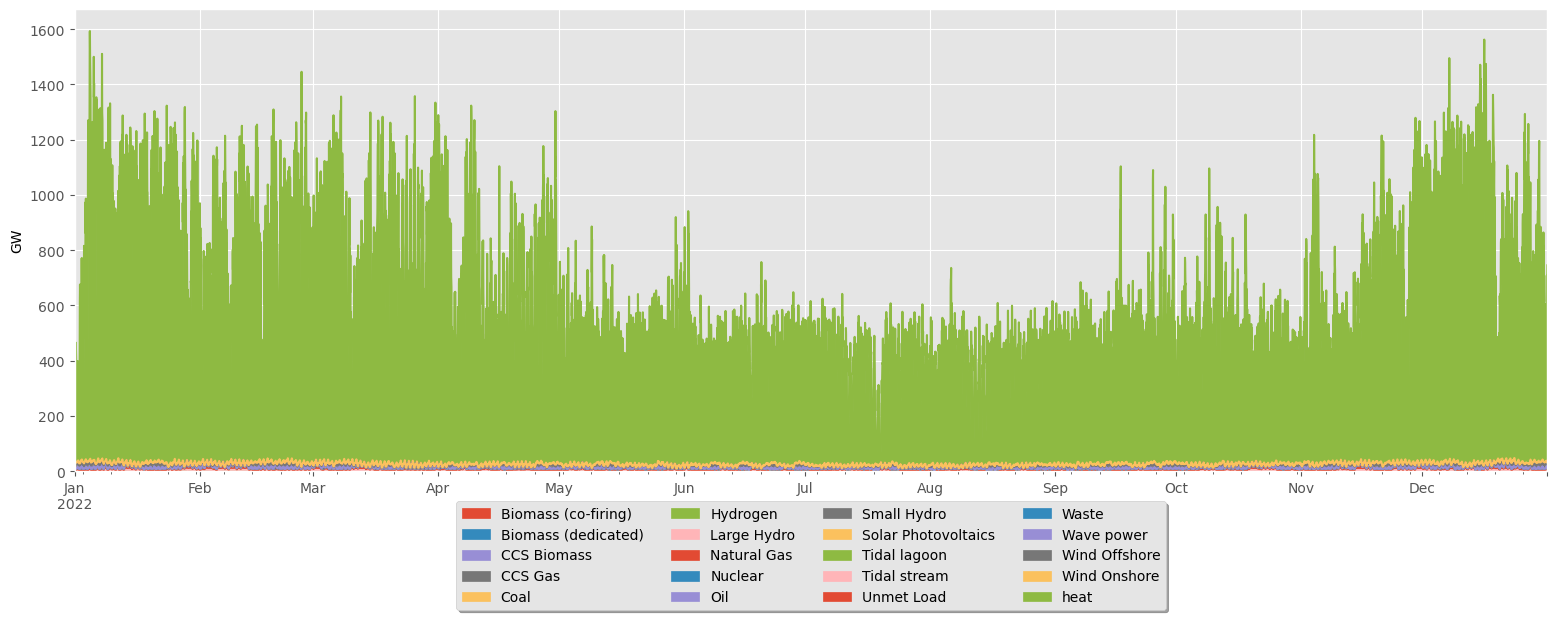

In [86]:
fig, ax= plt.subplots(figsize=(19, 6))

p_by_carrier.plot(ax=ax,kind='area')
ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.05),
         fancybox=True,shadow=True,ncol=4)
#plt.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylabel('GW')
ax.set_xlabel('')

In [87]:
# interconnector exports
exports = My_network.loads_t.p
# multiply by negative one to convert it as a generator
# i.e. export is a positive load, but negative generator
exports['Interconnectors Export'] = exports.iloc[:, -6:].sum(axis=1) * -1

interconnector_export = exports[['Interconnectors Export']]


# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])# +
    #p_by_carrier['Landfill Gas'] + p_by_carrier['Anaerobic Digestion'] +
    #p_by_carrier['Sewage Sludge Digestion'])


# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

p_by_carrier

carrier,Biomass (co-firing),Biomass (dedicated),CCS Biomass,CCS Gas,Coal,Hydrogen,Hydro,Natural Gas,Nuclear,Oil,...,Solar Photovoltaics,Tidal lagoon,Tidal stream,Unmet Load,Waste,Wave power,Wind Offshore,Wind Onshore,heat,Biomass
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.303255,1.526622,4.233127,0.0,...,0.0,0.000000,0.004964,0.0,0.0,0.0,13.907902,7.817278,45.985180,3.399601
2022-01-01 01:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.284648,0.000000,4.250032,0.0,...,0.0,0.000000,0.013032,0.0,0.0,0.0,13.890485,7.743599,35.622995,3.399601
2022-01-01 02:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.284426,0.000000,4.266937,0.0,...,0.0,0.000395,0.012620,0.0,0.0,0.0,13.497983,7.945400,35.232562,3.399601
2022-01-01 03:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.338254,0.000000,4.283842,0.0,...,0.0,0.000000,0.006720,0.0,0.0,0.0,13.511214,8.160998,41.515966,3.399601
2022-01-01 04:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.419550,0.000000,4.300747,0.0,...,0.0,0.004838,0.001352,0.0,0.0,0.0,13.493981,8.126333,78.417464,3.399601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.52122,3.100335,0.0,0.0,0.0,0.0,0.703927,8.465067,4.434750,0.0,...,0.0,0.011681,0.002376,0.0,0.0,0.0,14.352474,5.798360,517.784415,3.621555
2022-12-31 20:00:00,0.52122,3.100335,0.0,0.0,0.0,0.0,0.663065,9.140802,4.434750,0.0,...,0.0,0.006497,0.000000,0.0,0.0,0.0,13.814889,5.654277,670.793339,3.621555
2022-12-31 21:00:00,0.52122,3.100335,0.0,0.0,0.0,0.0,0.596121,5.347337,4.434750,0.0,...,0.0,0.000126,0.008424,0.0,0.0,0.0,12.743998,5.585330,581.388244,3.621555


In [88]:
# Add the heat pump dispatch to the generation data frame
p_hp=My_network.links_t.p1.sum(axis=1)
p_by_carrier['Heat Pump']=p_hp.values.tolist()

In [89]:
p_by_carrier

carrier,Biomass (co-firing),Biomass (dedicated),CCS Biomass,CCS Gas,Coal,Hydrogen,Hydro,Natural Gas,Nuclear,Oil,...,Tidal lagoon,Tidal stream,Unmet Load,Waste,Wave power,Wind Offshore,Wind Onshore,heat,Biomass,Heat Pump
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.303255,1.526622,4.233127,0.0,...,0.000000,0.004964,0.0,0.0,0.0,13.907902,7.817278,45.985180,3.399601,-9909.072970
2022-01-01 01:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.284648,0.000000,4.250032,0.0,...,0.000000,0.013032,0.0,0.0,0.0,13.890485,7.743599,35.622995,3.399601,-14077.631680
2022-01-01 02:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.284426,0.000000,4.266937,0.0,...,0.000395,0.012620,0.0,0.0,0.0,13.497983,7.945400,35.232562,3.399601,-15506.632591
2022-01-01 03:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.338254,0.000000,4.283842,0.0,...,0.000000,0.006720,0.0,0.0,0.0,13.511214,8.160998,41.515966,3.399601,-16363.816190
2022-01-01 04:00:00,0.52122,2.878381,0.0,0.0,0.0,0.0,0.419550,0.000000,4.300747,0.0,...,0.004838,0.001352,0.0,0.0,0.0,13.493981,8.126333,78.417464,3.399601,-21153.411785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.52122,3.100335,0.0,0.0,0.0,0.0,0.703927,8.465067,4.434750,0.0,...,0.011681,0.002376,0.0,0.0,0.0,14.352474,5.798360,517.784415,3.621555,-6604.612039
2022-12-31 20:00:00,0.52122,3.100335,0.0,0.0,0.0,0.0,0.663065,9.140802,4.434750,0.0,...,0.006497,0.000000,0.0,0.0,0.0,13.814889,5.654277,670.793339,3.621555,-7000.034615
2022-12-31 21:00:00,0.52122,3.100335,0.0,0.0,0.0,0.0,0.596121,5.347337,4.434750,0.0,...,0.000126,0.008424,0.0,0.0,0.0,12.743998,5.585330,581.388244,3.621555,-7332.964879


In [90]:
cols = ["Nuclear", 'Biomass',
        "Coal", "Oil", "Natural Gas", 'Hydro',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics','Heat Pump'
       ]

In [91]:
p_by_carrier = p_by_carrier[cols]

Text(0.5, 0, '')

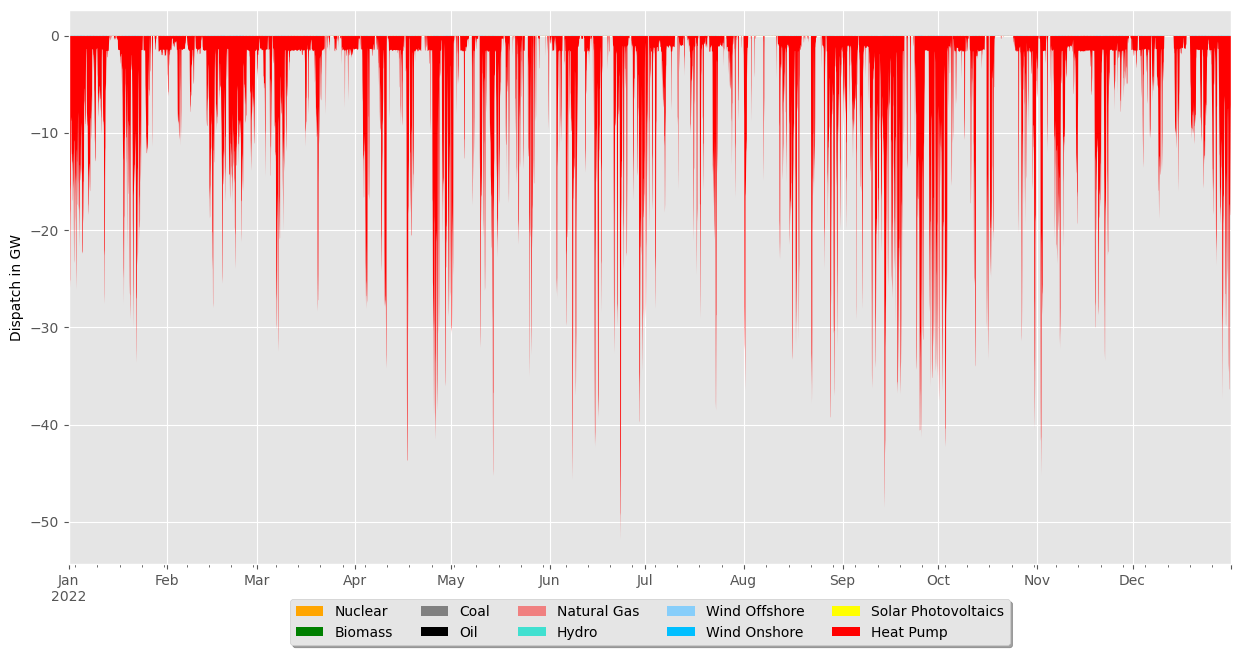

In [92]:
# we have aroudn 20 columns (generation type) but let us visualise the generation for the following types
#cols = ["Nuclear", 'Shoreline Wave', 'Biomass',
        #'EfW Incineration',
        #"Coal", "Oil", "Natural Gas", 'Pumped Storage Hydroelectric', 'Hydro',
        #"Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        #'Interconnectors Import','Heat Pump'
       # ]
p_by_carrier = p_by_carrier[cols]



#p_by_carrier.drop(
    #(p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    #axis=1, inplace=True)

    

colors = {
        "Coal": "grey",
        "Diesel/Gas oil": "black",
        "Diesel/gas Diesel/Gas oil": "black",
        'Oil': 'black',
        'Anaerobic Digestion': 'green',
        'Sewage Sludge Digestion': 'green',
        'Landfill Gas': 'green',
        'Biomass (dedicated)': 'green',
        'Biomass (co-firing)': 'green',
        'Biomass': 'green',
        "Sour gas": "lightcoral",
        "Natural Gas": "lightcoral",
        "Nuclear": "orange",
        'Tidal Barrage and Tidal Stream': 'aqua',
        'Hydro': "turquoise",
        "Large Hydro": "turquoise",
        "Small Hydro": "turquoise",
        "Pumped Storage Hydroelectric": "darkturquoise",
        "Wind Offshore": "lightskyblue",
        'Wind Onshore': 'deepskyblue',
        'Solar Photovoltaics': 'yellow',
        'Heat Pump': 'red'
}

    
fig,ax=plt.subplots(1,1)
fig.set_size_inches(15,8)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])   
    
    
    # Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                box.width, box.height * 0.9])

    
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("Dispatch in GW")
ax.set_xlabel("")

456.129451

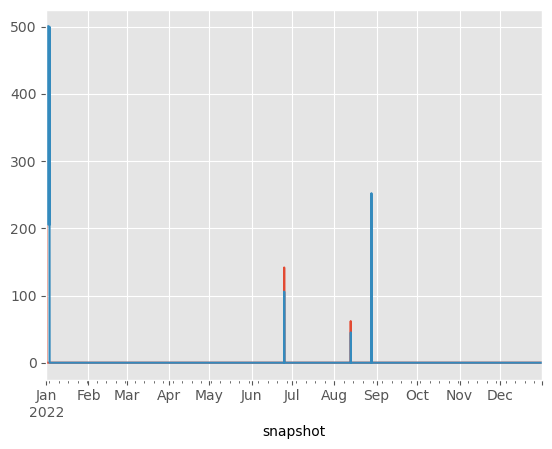

In [93]:
My_network.storage_units_t.p['STES_Beauly']
My_network.storage_units_t.p_store['STES_Beauly'].plot()
My_network.storage_units_t.p_dispatch['STES_Beauly'].plot() 
My_network.generators_t.p['boiler 1']
My_network.links_t.p1['heat pump Beauly']
326.129451+130

In [94]:
My_network.storage_units_t.state_of_charge

StorageUnit,Dinorwig,Ffestiniog,Cruachan,Foyers,STES_Beauly,STES_Peterhead,STES_Errochty,STES_Denny/BonnyBdige,STES_Neilston,STES_Strathaven,...,STES_Bramford,STES_Pelham,STES_Sundon_East_Claydon,STES_Melksham,STES_Bramley,STES_London,STES_Kemsley,STES_Sellindge,STES_Lovedean,STES_S_W_Penisula
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,9099.648000,1400.04,7099.840000,6212.679300,1.439710e+06,1.438602e+06,1.439445e+06,1.435977e+06,1.439741e+06,1.439445e+06,...,1.438180e+06,1.439445e+06,1.439445e+06,1.439445e+06,1.439445e+06,1.437017e+06,1.439445e+06,1.439445e+06,1.439445e+06,1.439816e+06
2022-01-01 01:00:00,9099.648000,1400.04,7099.840000,6125.358600,1.295511e+06,1.293595e+06,1.294945e+06,1.288356e+06,1.295698e+06,1.294945e+06,...,1.292542e+06,1.294945e+06,1.294945e+06,1.294945e+06,1.294945e+06,1.290333e+06,1.294945e+06,1.294945e+06,1.294945e+06,1.295730e+06
2022-01-01 02:00:00,9099.648000,1400.04,7099.840000,5778.537900,1.165732e+06,1.163067e+06,1.164895e+06,1.155497e+06,1.166054e+06,1.164895e+06,...,1.161468e+06,1.164895e+06,1.164895e+06,1.164895e+06,1.164895e+06,1.158317e+06,1.164895e+06,1.164895e+06,1.164895e+06,1.166053e+06
2022-01-01 03:00:00,9099.648000,1400.04,7099.840000,5431.717200,1.048909e+06,1.045362e+06,1.047850e+06,1.035924e+06,1.049062e+06,1.047850e+06,...,1.043502e+06,1.047850e+06,1.047850e+06,1.047850e+06,1.047850e+06,1.039503e+06,1.047850e+06,1.047850e+06,1.047850e+06,1.049312e+06
2022-01-01 04:00:00,9099.648000,1400.04,7099.840000,5084.896500,9.434630e+05,9.394274e+05,9.425098e+05,9.283078e+05,9.437698e+05,9.425098e+05,...,9.373319e+05,9.425098e+05,9.425098e+05,9.425098e+05,9.425098e+05,9.325700e+05,9.425098e+05,9.425098e+05,9.425098e+05,9.442341e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,3599.492904,0.00,843.057517,6065.671533,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2022-12-31 20:00:00,3599.492904,0.00,590.047656,5978.350833,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2022-12-31 21:00:00,1601.805672,0.00,306.596374,5891.030133,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


<Axes: xlabel='snapshot'>

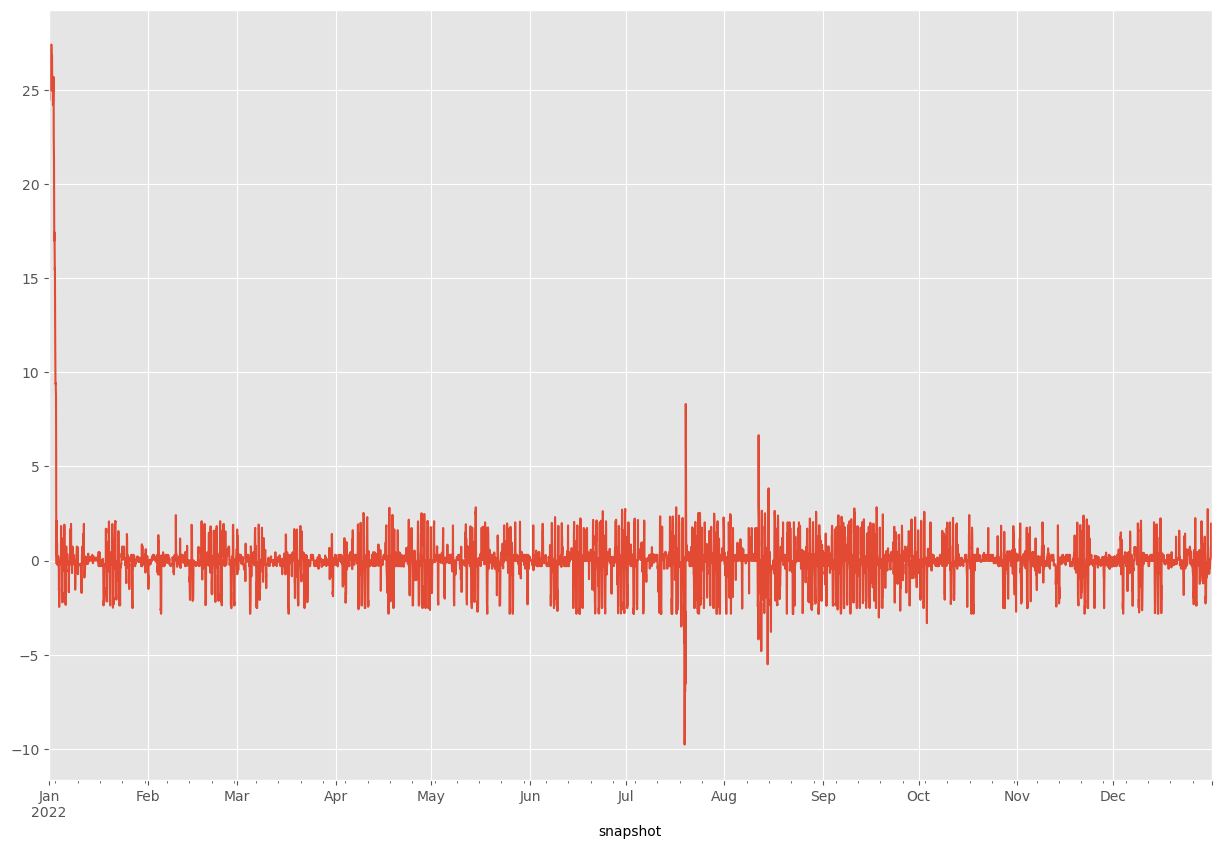

In [95]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_storage=My_network.storage_units_t.p.sum(axis=1).div(1e3)
p_storage.plot(ax=ax,label='Total Energy Storage Dispatch',linewidth=1.5)

Text(0.5, 0, '')

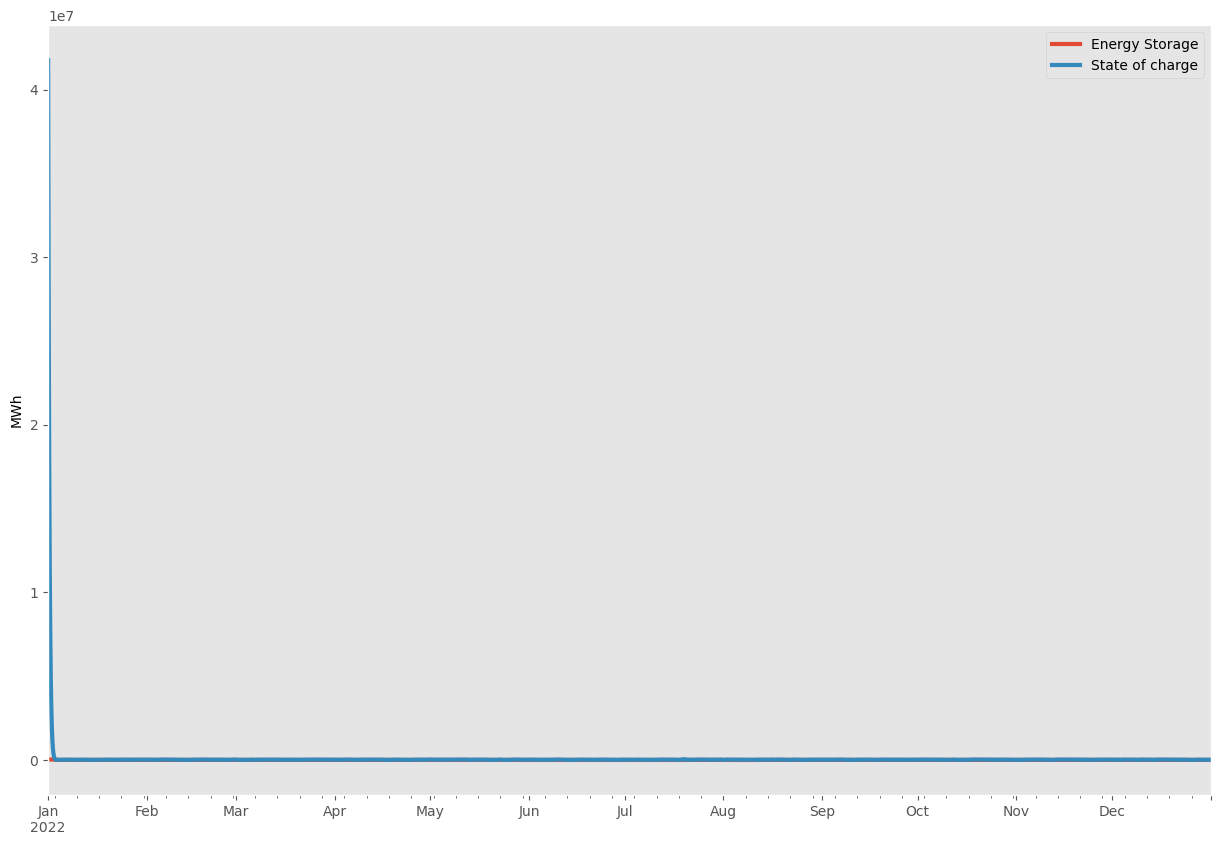

In [96]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = My_network.storage_units_t.p.sum(axis=1)
state_of_charge = My_network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Energy Storage", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

Plotting line loading
Look at the line loading stats and graph it

In [97]:
My_network.snapshots[139]

Timestamp('2022-01-06 19:00:00')

In [98]:
now = My_network.snapshots[139]

print("With the linear load flow, there is the following per unit loading:")
loading = My_network.lines_t.p0.loc[now] / My_network.lines.s_nom
loading.describe()

With the linear load flow, there is the following per unit loading:


count    105.000000
mean       0.070155
std        0.258467
min       -0.724167
25%       -0.028864
50%        0.046235
75%        0.203241
max        0.700000
dtype: float64

(<matplotlib.collections.PatchCollection at 0x25bb0e6c460>,
 <matplotlib.collections.LineCollection at 0x25bb0e8ddf0>)

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


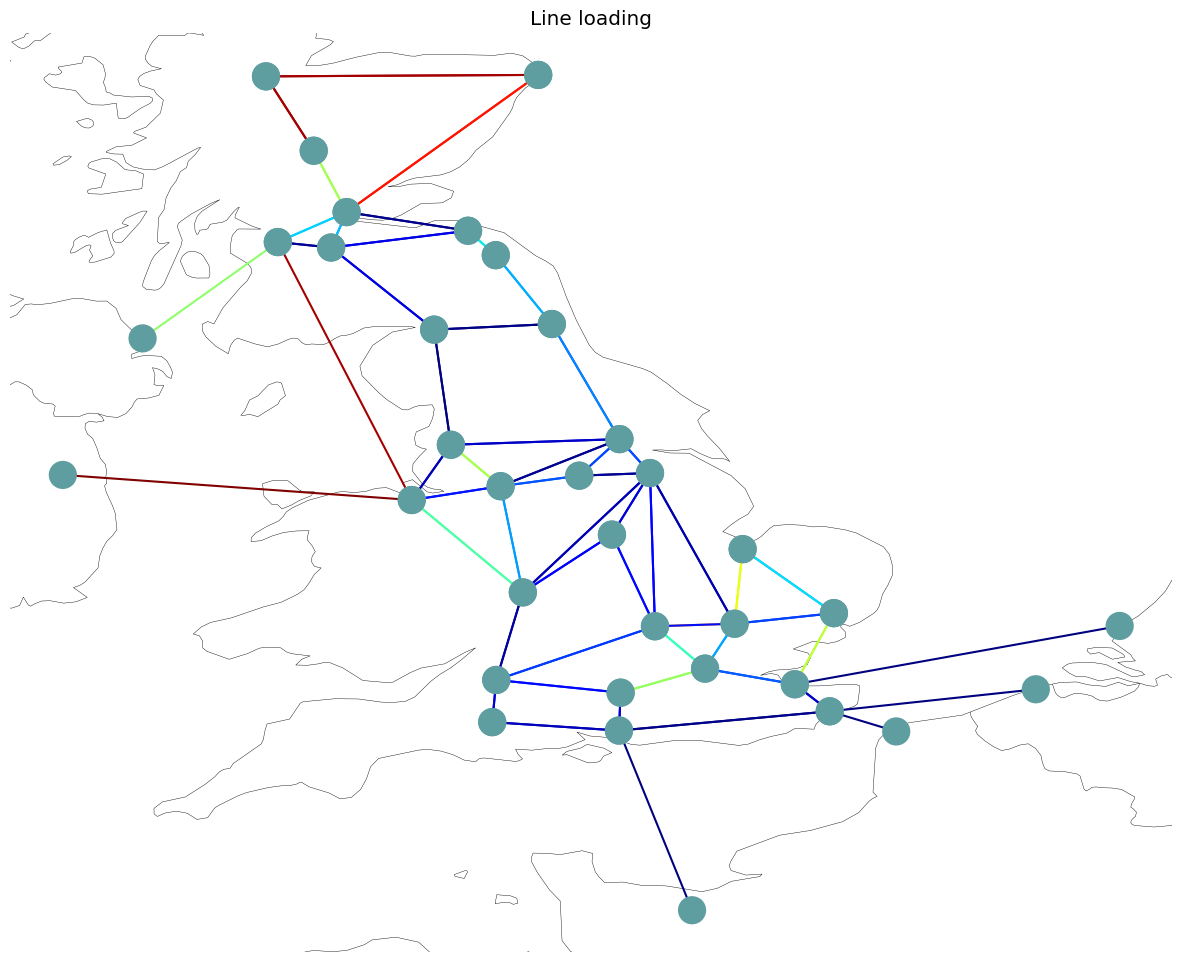

In [99]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)
My_network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

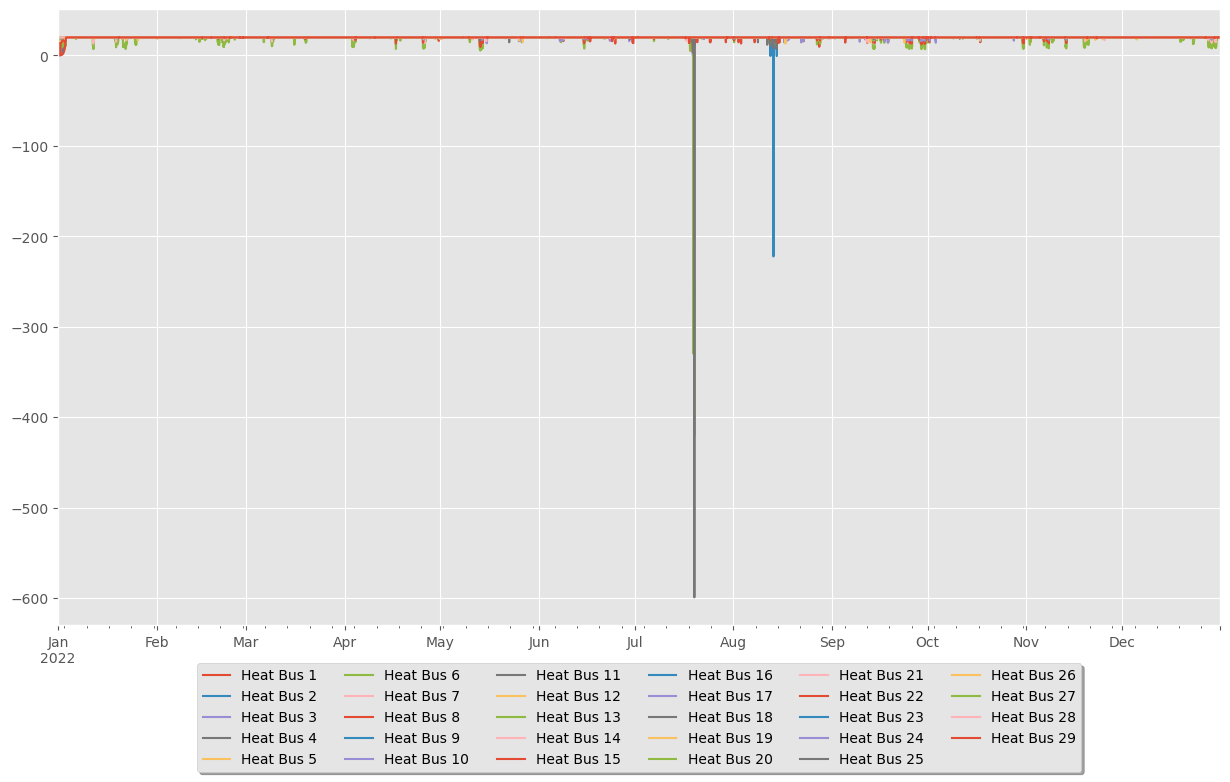

In [100]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(15,8)
My_network.buses_t.marginal_price.iloc[:,0:29].plot(ax=ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=6)


# negative mariginal price? what does it tell? during summer?

In [111]:
My_network.buses_t.marginal_price

Bus
Heat Bus 1    20.000000
Heat Bus 2    20.000000
Heat Bus 3    20.000000
Heat Bus 4    20.000000
Heat Bus 5    20.000000
                ...    
Belgium       70.864078
France1       70.864078
France2       70.916876
Ireland       75.545560
N. Ireland    32.006284
Name: 2022-01-06 19:00:00, Length: 64, dtype: float64

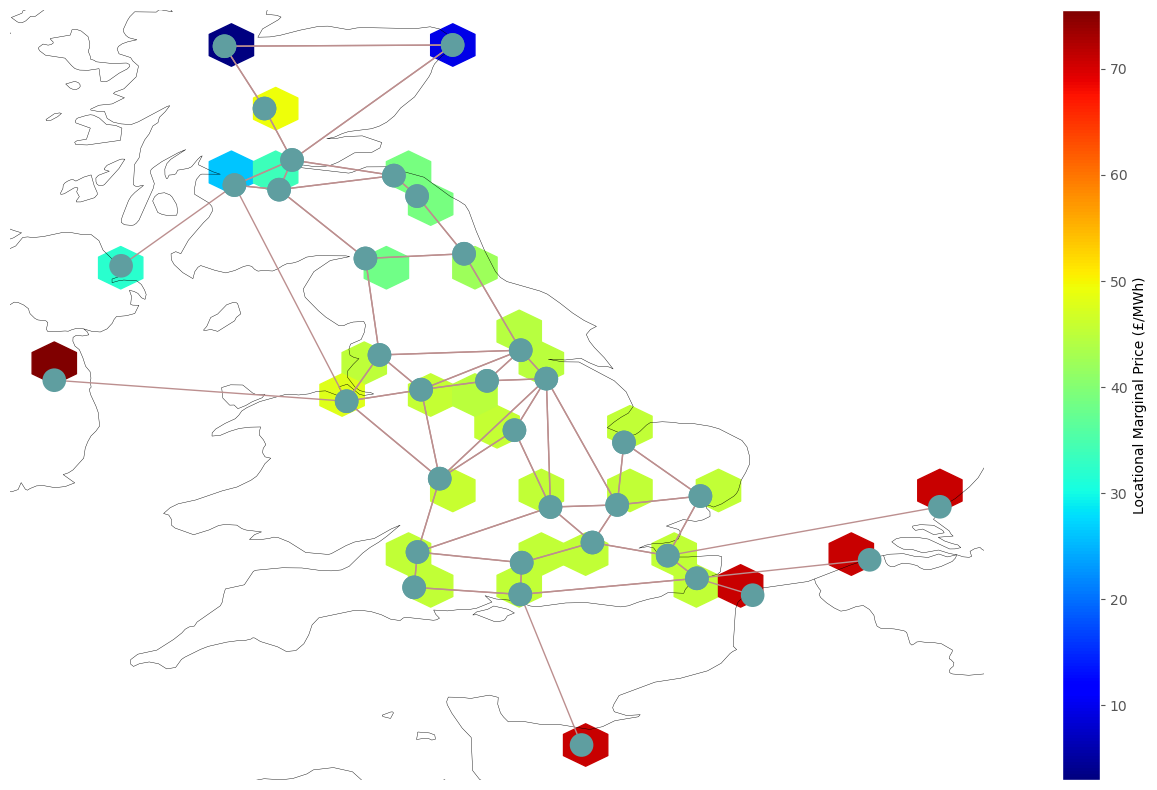

In [101]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

My_network.plot(ax=ax, line_widths=pd.Series(1, My_network.lines.index))
plt.hexbin(My_network.buses.x, My_network.buses.y,
           gridsize=20,
           C=My_network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar
cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

In [109]:
My_network.buses_t.marginal_price

Bus,Heat Bus 1,Heat Bus 2,Heat Bus 3,Heat Bus 4,Heat Bus 5,Heat Bus 6,Heat Bus 7,Heat Bus 8,Heat Bus 9,Heat Bus 10,...,Kemsley,Sellindge,Lovedean,S.W.Penisula,Netherlands,Belgium,France1,France2,Ireland,N. Ireland
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,-0.083350,20.000000,20.0,9.369722,-0.023003,8.840341,15.317010,-0.085302,20.0,19.551773,...,56.123022,58.413760,61.651687,62.547816,56.123022,58.413760,58.413760,61.651687,70.826725,-1.000000
2022-01-01 01:00:00,0.060865,0.193955,20.0,8.437979,0.083491,7.934858,13.713737,0.067628,20.0,17.612579,...,54.616218,55.265767,56.183895,56.439136,54.616218,55.265767,55.265767,56.183895,63.445433,-1.000000
2022-01-01 02:00:00,0.067628,0.215505,20.0,8.224727,0.092768,7.862382,13.642368,0.075142,20.0,17.433595,...,54.528303,55.035214,55.751726,55.951269,54.528303,55.035214,55.035214,55.751726,62.852048,-1.000000
2022-01-01 03:00:00,0.075142,20.000000,20.0,8.062453,0.103076,7.702227,13.506055,0.083491,20.0,17.348357,...,54.812399,55.149496,55.625979,55.759221,54.812399,55.149496,55.149496,55.625979,62.580326,-1.000000
2022-01-01 04:00:00,20.000000,20.000000,20.0,8.031097,0.114528,7.670017,13.387989,0.092768,20.0,17.343781,...,54.963572,55.170364,55.462661,55.545026,54.963572,55.170364,55.170364,55.462661,62.297096,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,...,70.680466,70.719000,70.773468,70.789673,70.680466,70.719000,70.719000,70.773468,75.548578,30.631969
2022-12-31 20:00:00,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,...,70.685789,70.722921,70.775407,70.791022,70.685789,70.722921,70.722921,70.775407,75.376712,32.094972
2022-12-31 21:00:00,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,...,70.680466,70.719000,70.773468,70.789673,70.680466,70.719000,70.719000,70.773468,75.548578,30.631969


# Visualization

 plotting curtailment

In [102]:
My_network.generators_t.p_max_pu.columns

Index(['Wind Offshore Keadby', 'Wind Offshore Stella West',
       'Wind Offshore Penwortham', 'Wind Offshore Neilston',
       'Wind Offshore Torness', 'Wind Offshore Bramford',
       'Wind Offshore Peterhead', 'Wind Offshore Deeside',
       'Wind Offshore Walpole', 'Wind Offshore Kemsley',
       'Wind Offshore Harker', 'Wind Offshore Sellindge',
       'Wind Offshore Lovedean', 'Wind Offshore Beauly',
       'Wind Onshore Thornton/Drax/Eggborough', 'Wind Onshore Keadby',
       'Wind Onshore Ratcliffe', 'Wind Onshore Stella West',
       'Wind Onshore Penwortham', 'Wind Onshore S.W.Penisula',
       'Wind Onshore Neilston', 'Wind Onshore Torness',
       'Wind Onshore Bramford', 'Wind Onshore Peterhead',
       'Wind Onshore Deeside', 'Wind Onshore Walpole', 'Wind Onshore Kemsley',
       'Wind Onshore Harker', 'Wind Onshore Sellindge', 'Wind Onshore Beauly',
       'Wind Onshore Melksham', 'Wind Onshore Pelham', 'Wind Onshore Daines',
       'Wind Onshore Th. Marsh/Stocksbridge',

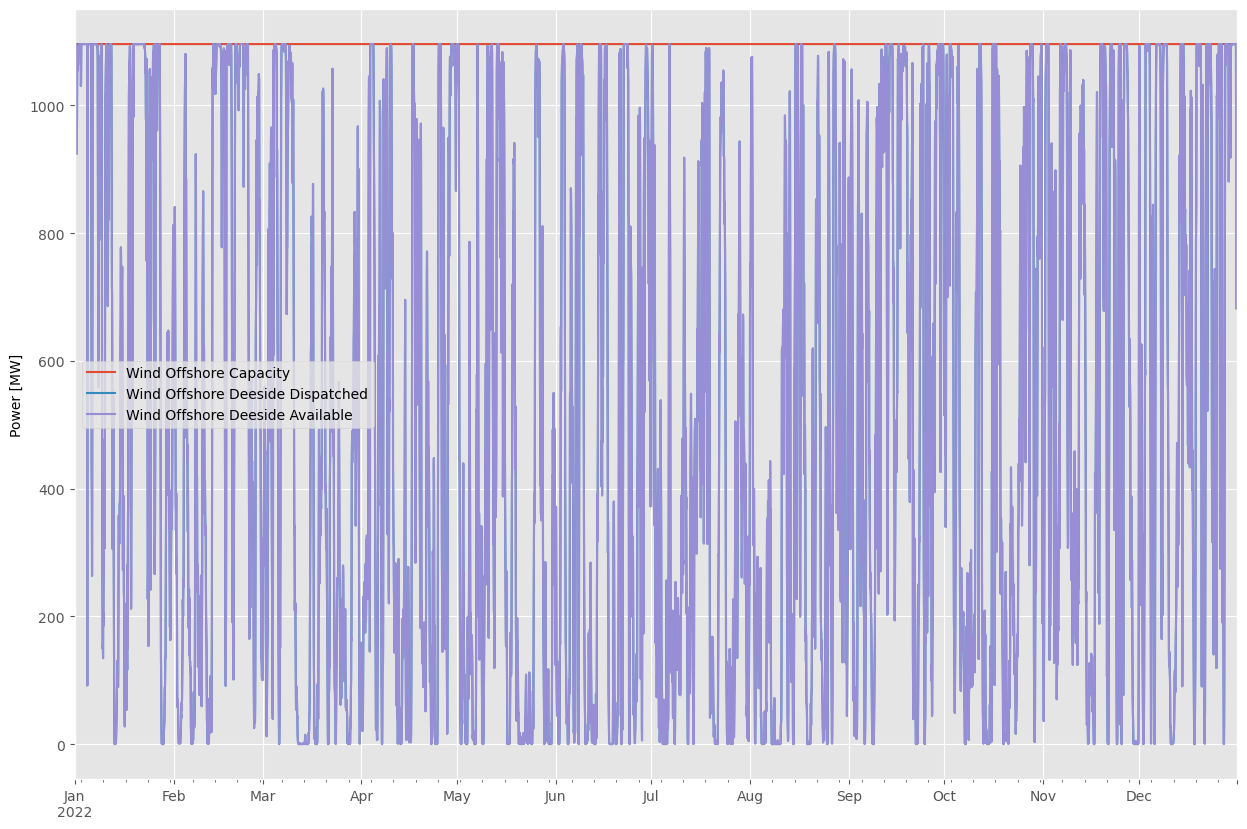

In [103]:
name='Wind Offshore Deeside'
type(My_network.generators_t.p_max_pu[name])
#My_network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
#p_available = My_network.generators_t.p_max_pu
wind_offshore_deeside_available=My_network.generators.at[name,'p_nom']*My_network.generators_t.p_max_pu[name]
# next find the dispatched power at deeside
dispatched_wind_offshore_deeside=My_network.generators_t.p['Wind Offshore Deeside']
curtailed_wind_offshore_deeside=wind_offshore_deeside_available-dispatched_wind_offshore_deeside

capacity = My_network.generators.at[name, "p_nom"]
capacity_t=pd.Series(capacity,index=My_network.generators_t.p['Wind Offshore Deeside'].index,name='Wind Offshore Capacity')
capacity_t


wind_offshore_deeside_df=pd.concat([capacity_t,dispatched_wind_offshore_deeside.rename('Wind Offshore Deeside Dispatched'),wind_offshore_deeside_available.rename('Wind Offshore Deeside Available')],axis=1)


fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
wind_offshore_deeside_df.plot(ax=ax)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

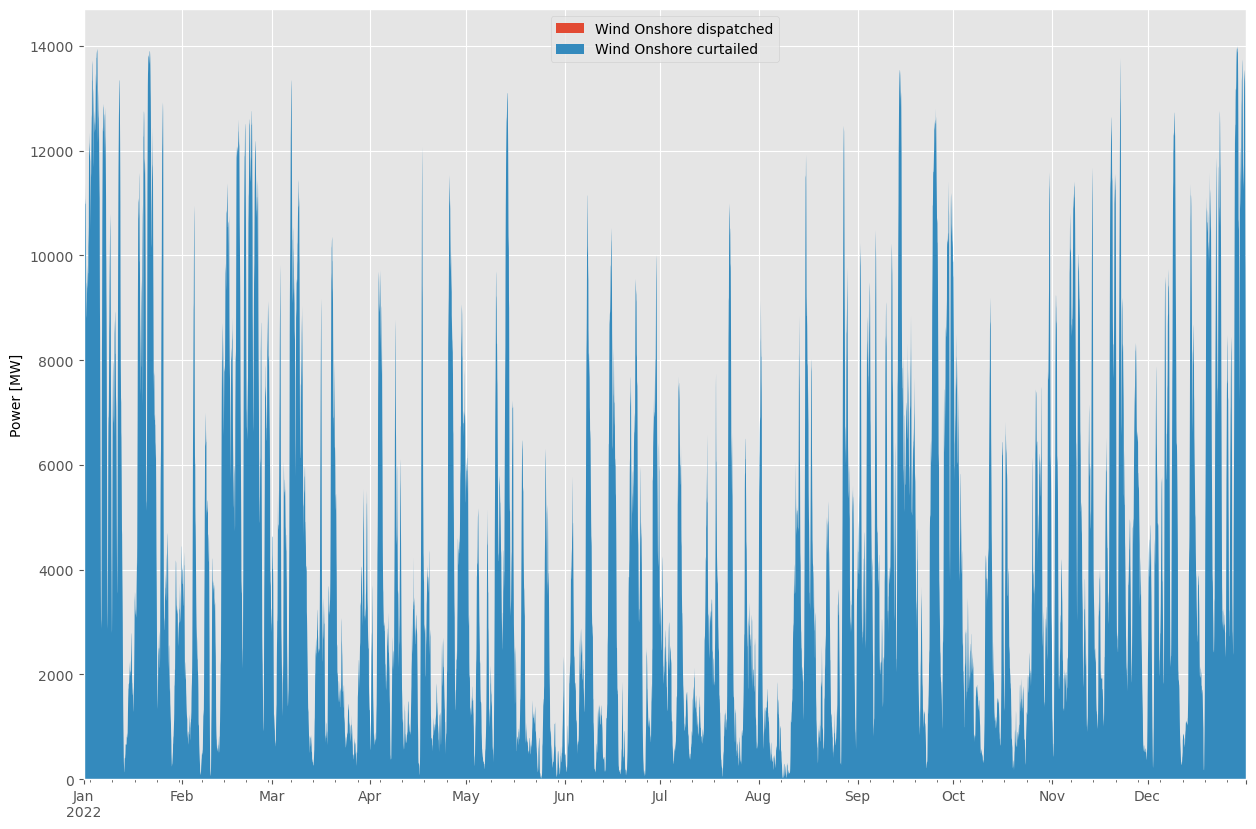

In [104]:
carrier = "Wind Onshore"

capacity = My_network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = My_network.generators_t.p_max_pu.multiply(My_network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(My_network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

Visualize the density of dwellings (number of dwellings) per each clustered local authority area. This will help the density of heat demand, connected to DHNs and HP in each clustered local authority area across GB.

In [105]:
My_network.generators_t.marginal_cost
#My_network.objective
#opex = My_network.snapshot_weightings.generators @ (My_network.generators_t.p * My_network.generators.marginal_cost).div(1e6) # M€/a

Generator,Drax - coal units,West Burton,Ratcliffe,Sutton Bridge,Baglan Bay,Severn Power,Blackburn,Damhead Creek,Rye House,Shoreham,...,Barra,Bowmore,Kirkwall,"Loch Carnan, South Uist",Stornoway,Tiree,Indian Queens,Grain (OCGT),Ratcliffe GT,Taylor's Lane GT
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,91.419145,91.419145,91.419145,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,...,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603
2022-01-01 01:00:00,91.419145,91.419145,91.419145,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,...,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603
2022-01-01 02:00:00,91.419145,91.419145,91.419145,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,...,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603
2022-01-01 03:00:00,91.419145,91.419145,91.419145,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,...,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603
2022-01-01 04:00:00,91.419145,91.419145,91.419145,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,...,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,91.419145,91.419145,91.419145,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,...,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603
2022-12-31 20:00:00,91.419145,91.419145,91.419145,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,...,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603
2022-12-31 21:00:00,91.419145,91.419145,91.419145,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,70.826725,...,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603,103.410603


In [106]:
My_network.generators.efficiency

Generator
Drax - coal units    1.0
West Burton          1.0
Ratcliffe            1.0
Hartlepool           1.0
Heysham 1            1.0
                    ... 
boiler 25            0.8
boiler 26            0.8
boiler 27            0.8
boiler 28            0.8
boiler 29            0.8
Name: efficiency, Length: 462, dtype: float64

In [107]:
emissions = My_network.generators_t.p / My_network.generators.efficiency * My_network.generators.carrier.map(My_network.carriers.co2_emissions) # t/h
emissions

Generator,Drax - coal units,West Burton,Ratcliffe,Hartlepool,Heysham 1,Heysham 2,Hinkley Point B,Hunterston B,Torness,Sizewell B,...,boiler 20,boiler 21,boiler 22,boiler 23,boiler 24,boiler 25,boiler 26,boiler 27,boiler 28,boiler 29
snapshot,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
My_network.generators.carrier.map(My_network.carriers.co2_emissions) # t/h
My_network.objective/1e9 # this is the total system cost in billion Pounds per year

104.73878738346954